In [ ]:
from tensorflow import keras
import tensorflow.keras.layers as layers
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import utils 
import random 


2025-06-03 15:39:18.462476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We read in the MNIST data set and format it such that it is compatible with the Keras interface.

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
img_rows, img_cols = 28, 28

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

print('Shapes of training and test data')
print('---------------------------------')
print('Shape of (feature) training data: ', X_train.shape)
print('Shpae of (feature) test data', X_test.shape)
print('Shpae of (label) training data', y_train.shape)
print('Shpae of (label) test data', y_test.shape)

Shapes of training and test data
---------------------------------
Shape of (feature) training data:  (60000, 28, 28, 1)
Shpae of (feature) test data (10000, 28, 28, 1)
Shpae of (label) training data (60000,)
Shpae of (label) test data (10000,)


The function `plot_history` below can be used to plot the outcome of Keras' `model.fit` routine.

In [3]:
def plot_history(history):
    x = range(history.params['epochs'])
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].set_title('accuracy')
    axarr[0].plot(x, acc, label='train')
    axarr[0].plot(x, val_acc, label='validation')
    axarr[0].legend()
    
    loss, val_loss = history.history['loss'], history.history['val_loss']
    axarr[1].set_title('loss')
    axarr[1].plot(x, loss, label='train')
    axarr[1].plot(x, val_loss, label='validation')
    axarr[1].legend()

/opt/anaconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4781 - loss: 1.7977 - val_accuracy: 0.8602 - val_loss: 0.6116
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.8611 - loss: 0.5597 - val_accuracy: 0.8921 - val_loss: 0.4018
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8905 - loss: 0.4067 - val_accuracy: 0.9047 - val_loss: 0.3409
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9016 - loss: 0.3532 - val_accuracy: 0.9120 - val_loss: 0.3115
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9073 - loss: 0.3249 - val_accuracy: 0.9189 - val_loss: 0.2869
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9161 - loss: 0.2941 - val_accuracy: 0.9225 - val_loss: 0.2719
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9211 - loss: 0.2802 - val_accuracy: 0.9267 - val_loss: 0.2573
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9252 - loss: 0.2677 - 

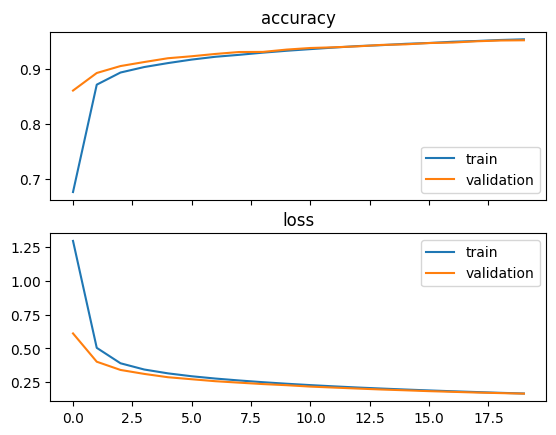

In [ ]:
print('Task 4.3')
model = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

history = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_test, Y_test),
    verbose=1
)
model.summary()
plot_history(history)

Task 4.4


/opt/anaconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9545 - loss: 0.1620 - val_accuracy: 0.9517 - val_loss: 0.1600
Epoch 2/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9556 - loss: 0.1592 - val_accuracy: 0.9530 - val_loss: 0.1570
Epoch 3/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9576 - loss: 0.1523 - val_accuracy: 0.9539 - val_loss: 0.1538
Epoch 4/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9578 - loss: 0.1498 - val_accuracy: 0.9539 - val_loss: 0.1496
Epoch 5/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9592 - loss: 0.1427 - val_accuracy: 0.9554 - val_loss: 0.1470
Epoch 6/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9611 - loss: 0.1392 - val_accuracy: 0.9560 - val_loss: 0.1434
Epoch 7/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9610 - loss: 0.1356 - val_accuracy: 0.9576 - val_loss: 0.1401
Epoch 8/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9615 - loss: 0.13

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

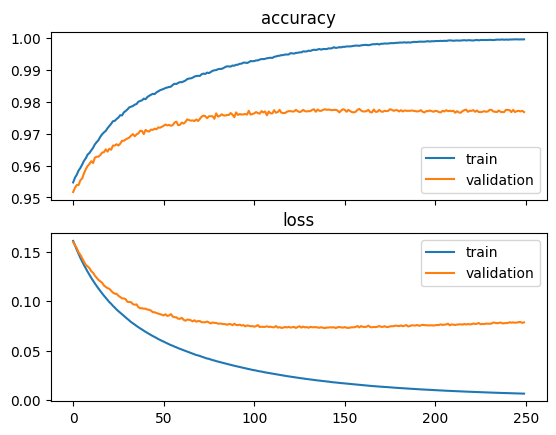

In [12]:
print('Task 4.4')
model2 = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout after first dense layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout after second dense layer
    layers.Dense(10, activation='softmax')
])

model2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

history2 = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=250,
    validation_data=(X_test, Y_test),
    verbose=1
)

model2.summary()
plot_history(history2)


In [ ]:
model3 = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout after first dense layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout after second dense layer
    layers.Dense(10, activation='softmax')
])

model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history3 = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_test, Y_test),
    verbose=1
)

model3.summary()
plot_history(history3)

In [ ]:
print('Task 4.5')

model4 = keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])


model4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history4 = model.fit(
    X_train, y_train,
    batch_size = 128,
    epochs=15,
    validation_data=(X_test, y_test),
    verbose=1
)

model4.summary()
plot_history(history4)

In [4]:
import mllab.pca

In [5]:
# Load the training data without pedestrians
train_no_ped = mllab.pca.load_pedestrian_images('train', False)
# Load the trainig data with pedestrians
train_ped = mllab.pca.load_pedestrian_images('train', True)

# Load the test data without pedestrians
test_no_ped = mllab.pca.load_pedestrian_images('test', False)
# Load the test data with pedestrians
test_ped = mllab.pca.load_pedestrian_images('test', True)

# Normalize the pixels to [0,1]
train_no_ped = train_no_ped /255.0
train_ped = train_ped/255.0
test_no_ped = test_no_ped/255.0
test_ped = test_ped /255.0

# Parameters for the images
height,width,channels = 100, 50, 3

In [14]:
X_train = np.concatenate([train_no_ped, train_ped], axis=0)
y_train =  np.concatenate(   (np.zeros(train_no_ped.shape[0]), np.ones(train_ped.shape[0])), axis=0)

print('Feature (train) shape', X_train.shape)
print('Label (train) shape', y_train.shape)

X_test = np.concatenate([test_no_ped, test_ped], axis=0)
y_test =  np.concatenate(   (np.zeros(test_no_ped.shape[0]), np.ones(test_ped.shape[0])), axis=0)
print('Feature (test) shape', X_test.shape)
print('Label (test) shape', y_test.shape)


Feature (train) shape (2000, 100, 50, 3)
Label (train) shape (2000,)
Feature (test) shape (1000, 100, 50, 3)
Label (test) shape (1000,)


In [ ]:
'''
# Reshape the data from (N, 100,50,3) to (N, 15000) for the training and test data sets
train_no_ped_reshape = train_no_ped.reshape(train_no_ped.shape[0], height*width*channels)
train_ped_reshape = train_ped.reshape(train_ped.shape[0], height*width*channels)
test_no_ped_reshape = test_no_ped.reshape(test_no_ped.shape[0], height*width*channels)
test_ped_reshape = test_ped.reshape(test_ped.shape[0], height*width*channels)

# Construct the features by stacking the features for np pedestrians and pedestrians
X_train = np.vstack((train_no_ped_reshape, train_ped_reshape))
# Construct the labels for training data by stacking the labels for no pedestrians and pedestrians
y_train =  np.hstack(   (np.zeros(train_no_ped_reshape.shape[0]), np.ones(train_ped_reshape.shape[0])))

# Construct the features for the test data 
X_test = np.vstack((test_no_ped_reshape, test_ped_reshape))
# Construct the labels for the test data 
y_test =  np.hstack(   (np.zeros(test_no_ped_reshape.shape[0]), np.ones(test_ped_reshape.shape[0])))
'''

In [ ]:
from sklearn.decomposition import PCA

# Set parameters for dimensionalty reduction
q = 200
# Create an instance of PCA 
pca = PCA(n_components = q)

# Transform the training data X_train from the PCA on the training data X_train
xq_train = pca.fit_transform(X_train)

# Transform the test data X_test based on the PCA on the training data X_train
xq_test = pca.transform(X_train)

# Percentage of captured variance from the PCA with q=200
pcv = pca.explained_variance_ratio_.sum()
print(f'Percentage of captured variance by PCA with {q} principal components: {pcv:.4f}')

/opt/anaconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5693 - loss: 0.7291 - val_accuracy: 0.7530 - val_loss: 0.5386
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8677 - loss: 0.3336 - val_accuracy: 0.8840 - val_loss: 0.3300
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9634 - loss: 0.1404 - val_accuracy: 0.9080 - val_loss: 0.2937
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9867 - loss: 0.0663 - val_accuracy: 0.9160 - val_loss: 0.2517
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9845 - loss: 0.0549 - val_accuracy: 0.8990 - val_loss: 0.2976
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9973 - loss: 0.0262 - val_accuracy: 0.8730 - val_loss: 0.2875
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9977 - loss: 0.0184 - val_accuracy: 0.9020 - val_loss: 0.2860
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9990 - loss: 0.0112 - val_accuracy: 0.9140 - val_loss:

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 98, 48, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 96, 46, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 48, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 35328)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,522,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,581,989 (51.81 MB)

 Trainable params: 4,527,329 (17.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,054,660 (34.54 MB)

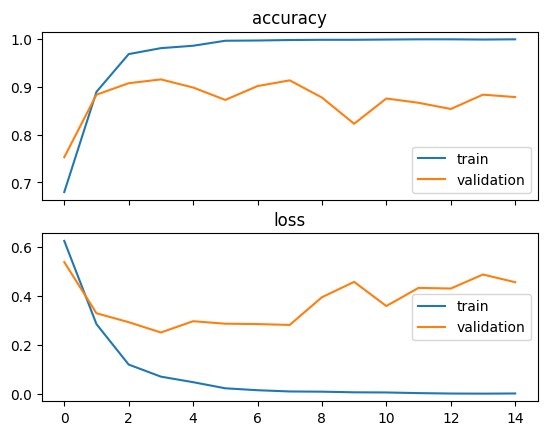

In [ ]:
# Define the convolutional neural network
cnn_model = keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(height, width, channels)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid') 
])

cnn_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = cnn_model.fit(
    X_train, y_train,
    batch_size = 128,
    epochs = 15,
    validation_data = (X_test, y_test),
    verbose=1
)

cnn_model.summary()
plot_history(history)

In [ ]:
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train)
print(f'Accuracy on training data: {train_accuracy}')

test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Accuracy on test data: {test_accuracy}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 1.0000 - loss: 0.0011
Train accuracy: 1.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.8768 - loss: 0.4955
Test accuracy: 0.8790000081062317


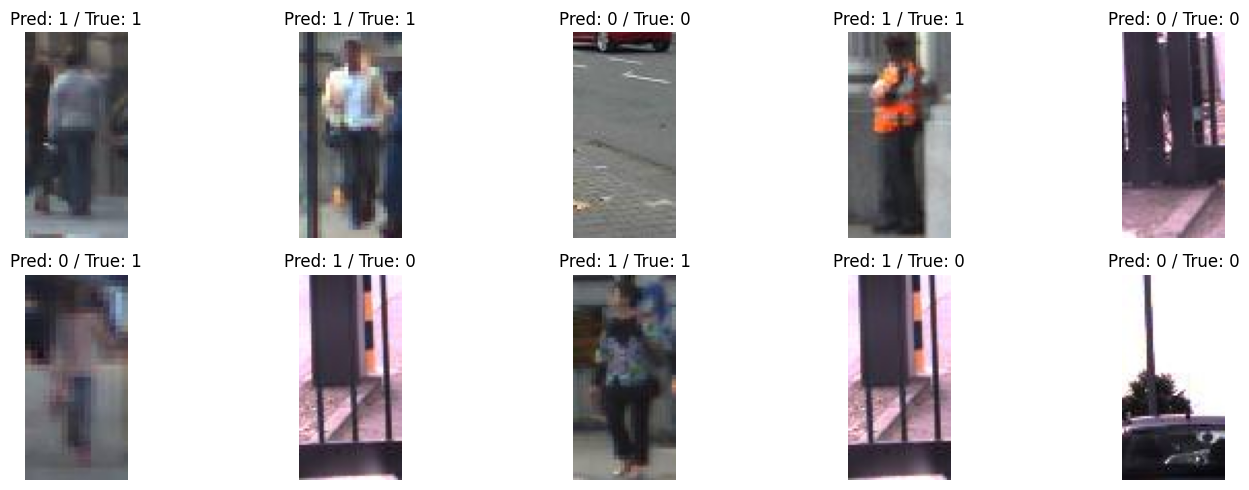

In [ ]:

# Extract predictions
y_pred_probs = cnn_model.predict(X_test)  # Returns probabilities
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
# Select random sample of test images
num_samples = 10
indices = random.sample(range(len(X_test)), num_samples)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    image = X_test[idx] * 255
    plt.imshow(image.astype("uint8"))  # adjust if your image is normalized
    plt.title(f"Pred: {y_pred[idx]} / True: {int(y_test[idx])}")
    plt.axis("off")
plt.tight_layout()
plt.show()